# Portfolio Pal - Stock Market Analysis 

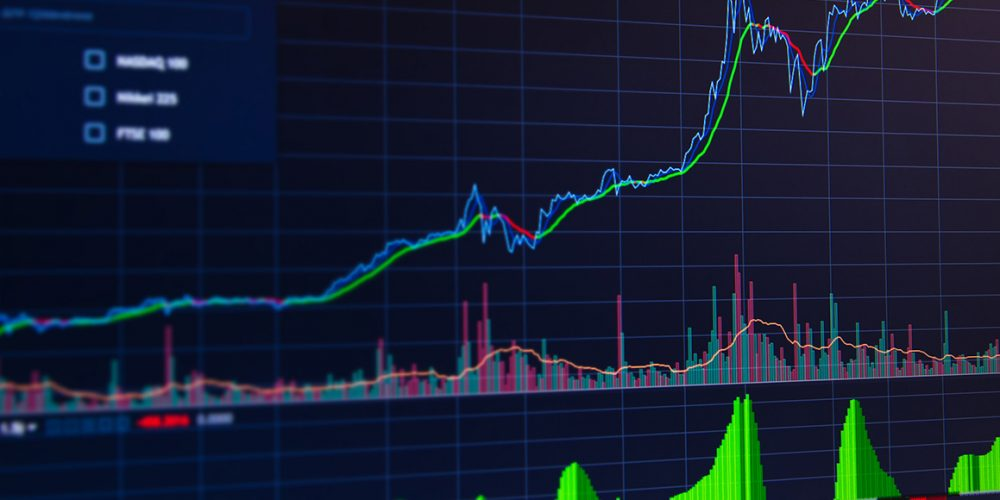

In this project we will be looking at data collected from the Dow Jones Industrial Average to make predictions using Machine Learning algorithms. The Pandas DataReader is utilized to get stock information from Yahoo Financial and I have provided methods to help visualize different aspects of this data. The goal of this project is not to automatically trade stocks for an investor, but instead to help investors analyze and interpret the risks associated with investing in a particular stock. Through the process of data visualization and exploratory analysis this project aims to equip investors with as much information as possible to help them determine what position they should take on a particular stock that is listed in the Dow 30 index. To help aid investors, we will attempt to utilize the fields of Reinforcement Learning to train a Deep Q Network (DQN) to help determine the best times to buy, sell or hold up to 3 stocks.

We will begin by analyzing the following aspects of the data:

    1.) Visualize different periods of selected stocks price change over time
    2.) Calculate daily return of the stock on average
    3.) Visualize the moving average of the various stocks
    4.) Determine the correlation between different stocks by performing exploratory analysis
    5.) Visualize the risk vs expected return for investing in a particular stock
    6.) Attempt to predict stock prices using Deep Reinforcement Learning
    7.) Perform Backtesting with Pyfolio to determine the performance of our ML agents
   

# 1. Determine the change of a stock's price over time

In this section we'll begin by loading in our data and go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock. If there is no stock data in the current repository begin by running the generate_stock_data.py file.

In [4]:
# Here we have all of our basic imports for our exploratory analysis
import warnings
warnings.filterwarnings('ignore')
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fast")

# inline sets matplotlib to output graphs in Jupyter Notebook
%matplotlib inline 

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime, timedelta

In [5]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from finrl.config import config

# For time stamps
from datetime import datetime, timedelta

import os
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

#Populate the stock index with the stocks you're interested in
stock_data = {}
YEARS_FROM_PRESENT = 10
stock_index = config.DOW_30_TICKER

# Set up End and Start times for data grab
# We don't want today, because the closing price isn't final yet
end = datetime.now() - timedelta(days=1)
start = datetime(end.year - YEARS_FROM_PRESENT, end.month, end.day)

#For loop for grabing yahoo finance data and setting it as a dataframe. 
for ticker in stock_index:   
    try:
        print(f"Downloading {ticker} stock data...")
        stock_data[ticker] = DataReader(ticker, 'yahoo', start, end)
        stock_data[ticker]['Ticker'] = ticker
    except:
        print(f"Unable to get data for {ticker} ticker.")

Now that we have loaded in all the data up to yesterdays closing numbers, we can begin visualizing some of the data we've collected. For example we can show what the dataframe looks like for a particular stock.

In [6]:
example = ''
print(f"Current Index:{stock_index}")
while example not in stock_index:
    example = input("Enter a stock ticker:") 

Current Index:['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ', 'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']
Enter a stock ticker:AAPL


In [7]:
stock_data[example]

High         Low        Open       Close       Volume  \
Date                                                                      
2011-05-05   12.533929   12.358929   12.442857   12.383929  335969200.0   
2011-05-06   12.500000   12.364643   12.488929   12.380714  280134400.0   
2011-05-09   12.471429   12.376071   12.423571   12.414286  204747200.0   
2011-05-10   12.488929   12.380714   12.460357   12.480357  282091600.0   
2011-05-11   12.500000   12.330000   12.465000   12.401071  336000000.0   
...                ...         ...         ...         ...          ...   
2021-04-29  137.070007  132.449997  136.470001  133.479996  151101000.0   
2021-04-30  133.559998  131.070007  131.779999  131.460007  109713200.0   
2021-05-03  134.070007  131.830002  132.039993  132.539993   75135100.0   
2021-05-04  131.490005  126.699997  131.190002  127.849998  137564700.0   
2021-05-05  130.449997  127.970001  129.199997  128.100006   83826300.0   

             Adj Close Ticker  
Date                           
2011-05-05   10.667065   AAPL  
2011-05-06   10.664294   AAPL  
2011-05-09   10.693214   AAPL  
2011-05-10   10.750122   AAPL  
2011-05-11   10.681831   AAPL  
...                ...    ...  
2021-04-29  133.479996   AAPL  
2021-04-30  131.460007   AAPL  
2021-05-03  132.539993   AAPL  
2021-05-04  127.849998   AAPL  
2021-05-05  128.100006   AAPL  

[2517 rows x 7 columns]

In [8]:
stock_data[example].describe()

High          Low         Open        Close        Volume  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean     40.591429    39.740587    40.171206    40.179553  2.422260e+08   
std      29.660776    28.853530    29.281654    29.268350  1.920006e+08   
min      11.346429    11.089286    11.310000    11.261429  4.544800e+07   
25%      21.071428    20.642857    20.883215    20.898571  1.107372e+08   
50%      29.440001    29.007500    29.202499    29.192499  1.722536e+08   
75%      47.412498    46.650002    47.000000    47.044998  3.086608e+08   
max     145.089996   141.369995   143.600006   143.160004  1.506120e+09   

         Adj Close  
count  2517.000000  
mean     38.487929  
std      29.887187  
min       9.700181  
25%      18.068214  
50%      27.232977  
75%      45.699455  
max     142.946396

In [9]:
for ticker in stock_index:
    print(f"\n{ticker}")
    stock_data[ticker].info()


AAPL
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-05-05 to 2021-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Ticker     2517 non-null   object 
dtypes: float64(6), object(1)
memory usage: 157.3+ KB

MSFT
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-05-05 to 2021-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   T

Now we can get a historical view of the adjusted closing price for a list of stocks for a given date range in the last 10 years. You an also type STOCK_INDEX to get the entire index!

Current Index:['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ', 'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']
Enter a list of tickers separated by whitespace:STOCK_INDEX
Date Range: 2011-05-05 00:00:00 - 2021-05-05 00:00:00
Note: Some dates may be unavailable
Enter a valid start date (YYYY-MM-DD):2020-01-02
Enter a valid end date (YYYY-MM-DD):2021-05-05


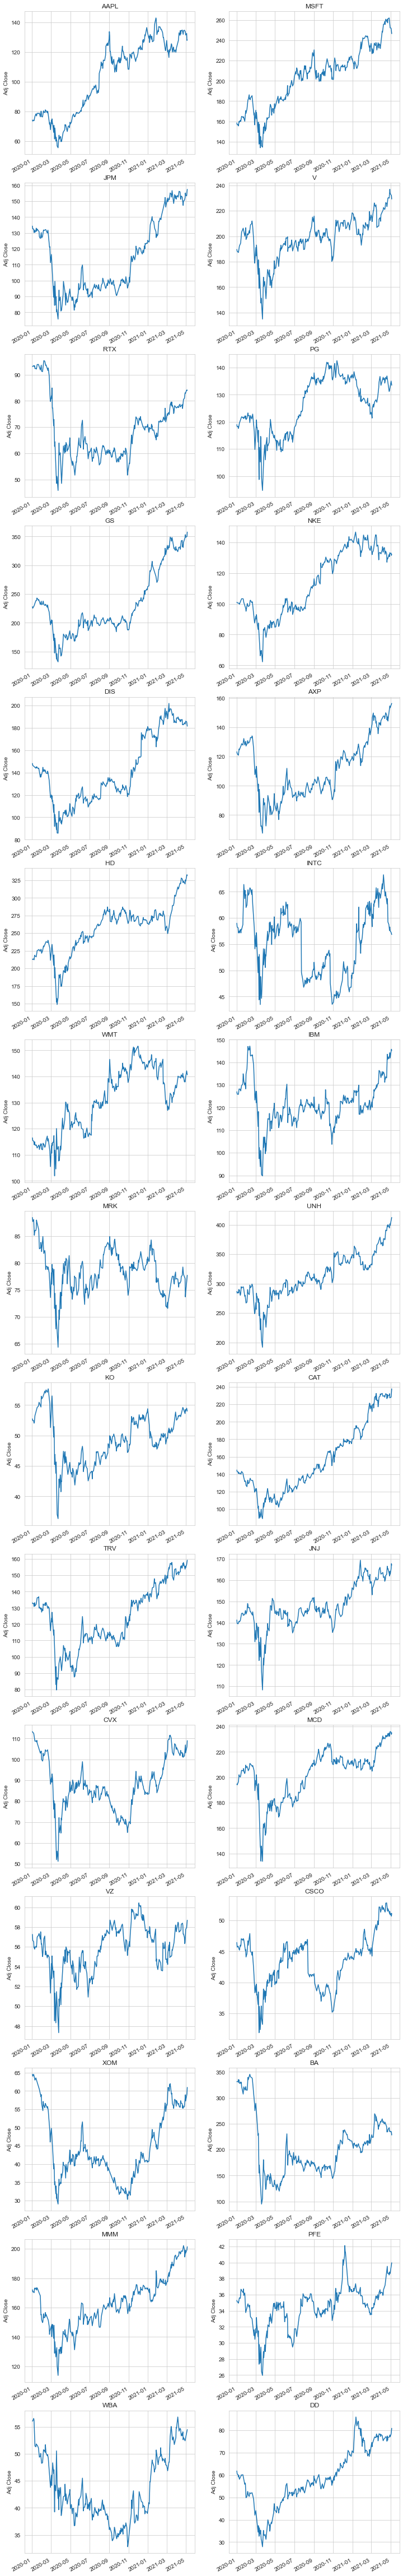

In [12]:
tickers = ['']
valid_input = False
print(f"Current Index:{stock_index}")
while not valid_input:
    valid_input = True
    for ticker in tickers:
        if ticker not in stock_index:
            user_input = input("Enter a list of tickers separated by whitespace:")
            if user_input == "STOCK_INDEX":
                tickers = stock_index
            else:
                valid_input = False
                tickers = user_input.split(' ')
            break

max_index = stock_data[tickers[0]].index.max()
min_index = stock_data[tickers[0]].index.min()
for ticker in tickers:
    index = stock_data[ticker].index.max()
    if max_index < index:
        max_index = index
    index = stock_data[ticker].index.min()
    if min_index > index:
        min_index = index
    
print(f"Date Range: {min_index} - {max_index}")
print("Note: Some dates may be unavailable")

valid_input = False
while not valid_input:
    valid_input = True
    start = input(f"Enter a valid start date (YYYY-MM-DD):")
    if start not in stock_data[tickers[0]].index:
        valid_input = False

valid_input = False

while not valid_input:
    valid_input = True
    end = input(f"Enter a valid end date (YYYY-MM-DD):")
    if end not in stock_data[tickers[0]].index or end < start:
        valid_input = False

nrows = math.ceil(len(tickers)/2)        
plt.figure(figsize=(12, 4 * nrows))
plt.subplots_adjust(top=1.25, bottom=1.2)

target_data = {}

for i, ticker in enumerate(tickers, 1):
    plt.subplot(nrows, 2, i)
    target_data[ticker] = stock_data[ticker][start:end]
    target_data[ticker]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{ticker}")

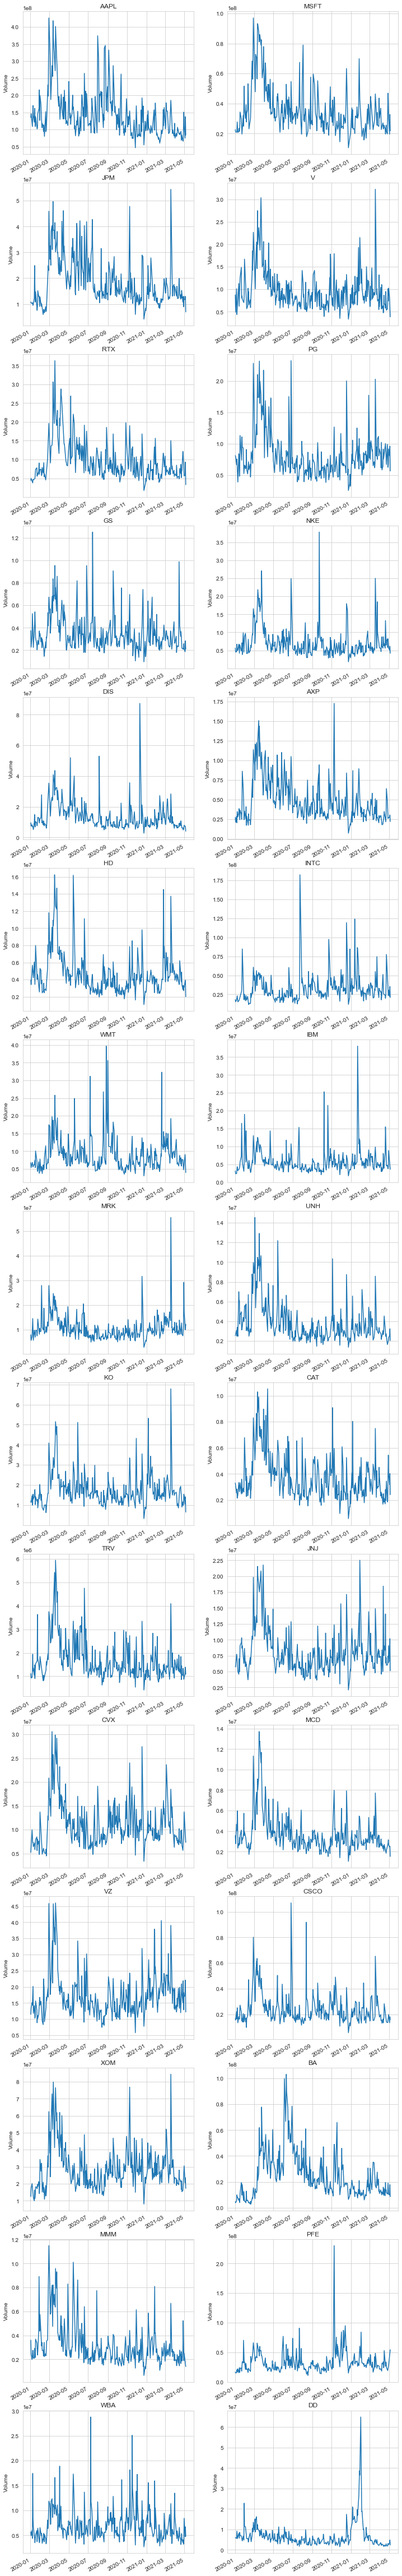

In [13]:
# Plotting the total volume of stock being traded each day for the inputed stocks and date range
plt.figure(figsize=(12, 4 * nrows))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, ticker in enumerate(tickers, 1):
    plt.subplot(nrows, 2, i)
    target_data[ticker]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{ticker}")

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. Calculate and append the moving average for the dataset

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for ticker in stock_index:
        column_name = f"MA for {ma} days"
        stock_data[ticker][column_name] = stock_data[ticker]['Adj Close'].rolling(ma).mean()
        
target_data = {}

for ticker in tickers:
    target_data[ticker] = stock_data[ticker].loc[start:end]

In [15]:
target_data[tickers[0]]

High         Low        Open       Close       Volume  \
Date                                                                      
2020-01-02   75.150002   73.797501   74.059998   75.087502  135480400.0   
2020-01-03   75.144997   74.125000   74.287498   74.357498  146322800.0   
2020-01-06   74.989998   73.187500   73.447502   74.949997  118387200.0   
2020-01-07   75.224998   74.370003   74.959999   74.597504  108872000.0   
2020-01-08   76.110001   74.290001   74.290001   75.797501  132079200.0   
...                ...         ...         ...         ...          ...   
2021-04-29  137.070007  132.449997  136.470001  133.479996  151101000.0   
2021-04-30  133.559998  131.070007  131.779999  131.460007  109713200.0   
2021-05-03  134.070007  131.830002  132.039993  132.539993   75135100.0   
2021-05-04  131.490005  126.699997  131.190002  127.849998  137564700.0   
2021-05-05  130.449997  127.970001  129.199997  128.100006   83826300.0   

             Adj Close Ticker  MA for 10 days  MA for 20 days  MA for 50 days  
Date                                                                           
2020-01-02   74.333511   AAPL       71.096350       69.096387       65.864540  
2020-01-03   73.610840   AAPL       71.534159       69.538032       66.152559  
2020-01-06   74.197395   AAPL       72.023694       69.961487       66.436420  
2020-01-07   73.848442   AAPL       72.492687       70.304013       66.711327  
2020-01-08   75.036385   AAPL       72.967619       70.752835       66.995188  
...                ...    ...             ...             ...             ...  
2021-04-29  133.479996   AAPL      133.804001      131.830500      126.373800  
2021-04-30  131.460007   AAPL      133.534001      132.253501      126.408800  
2021-05-03  132.539993   AAPL      133.304001      132.585500      126.462200  
2021-05-04  127.849998   AAPL      132.778001      132.667500      126.499200  
2021-05-05  128.100006   AAPL      132.238001      132.677501      126.544000  

[338 rows x 10 columns]

Now we can view the histograms of daily returns for the tickers from our target dataset.

Stock Index: ['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ', 'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']
Enter Stock ticker:AAPL


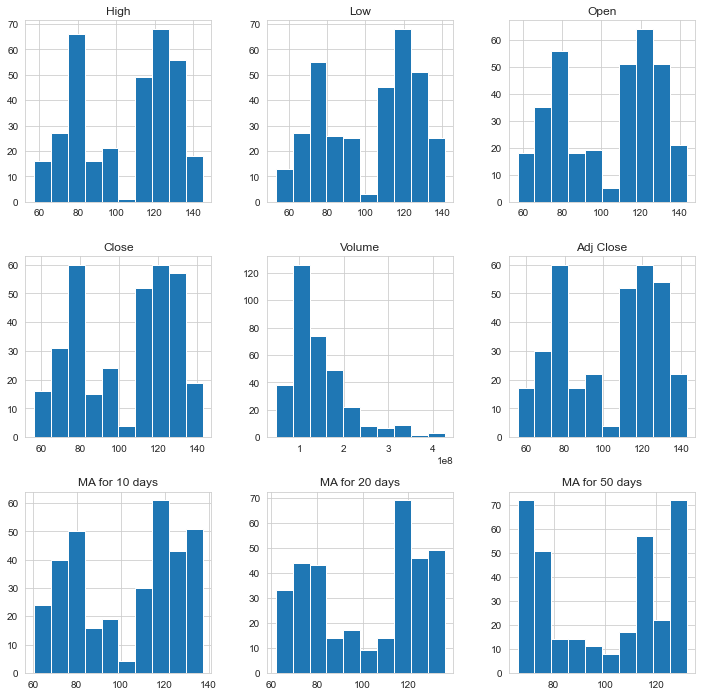

In [17]:
target = ''
keys = list(target_data.keys())
print(f"Stock Index: {stock_index}")
while target not in keys:
    target = input(f"Enter Stock ticker:")

target_data[target].hist(figsize=(12, 12));

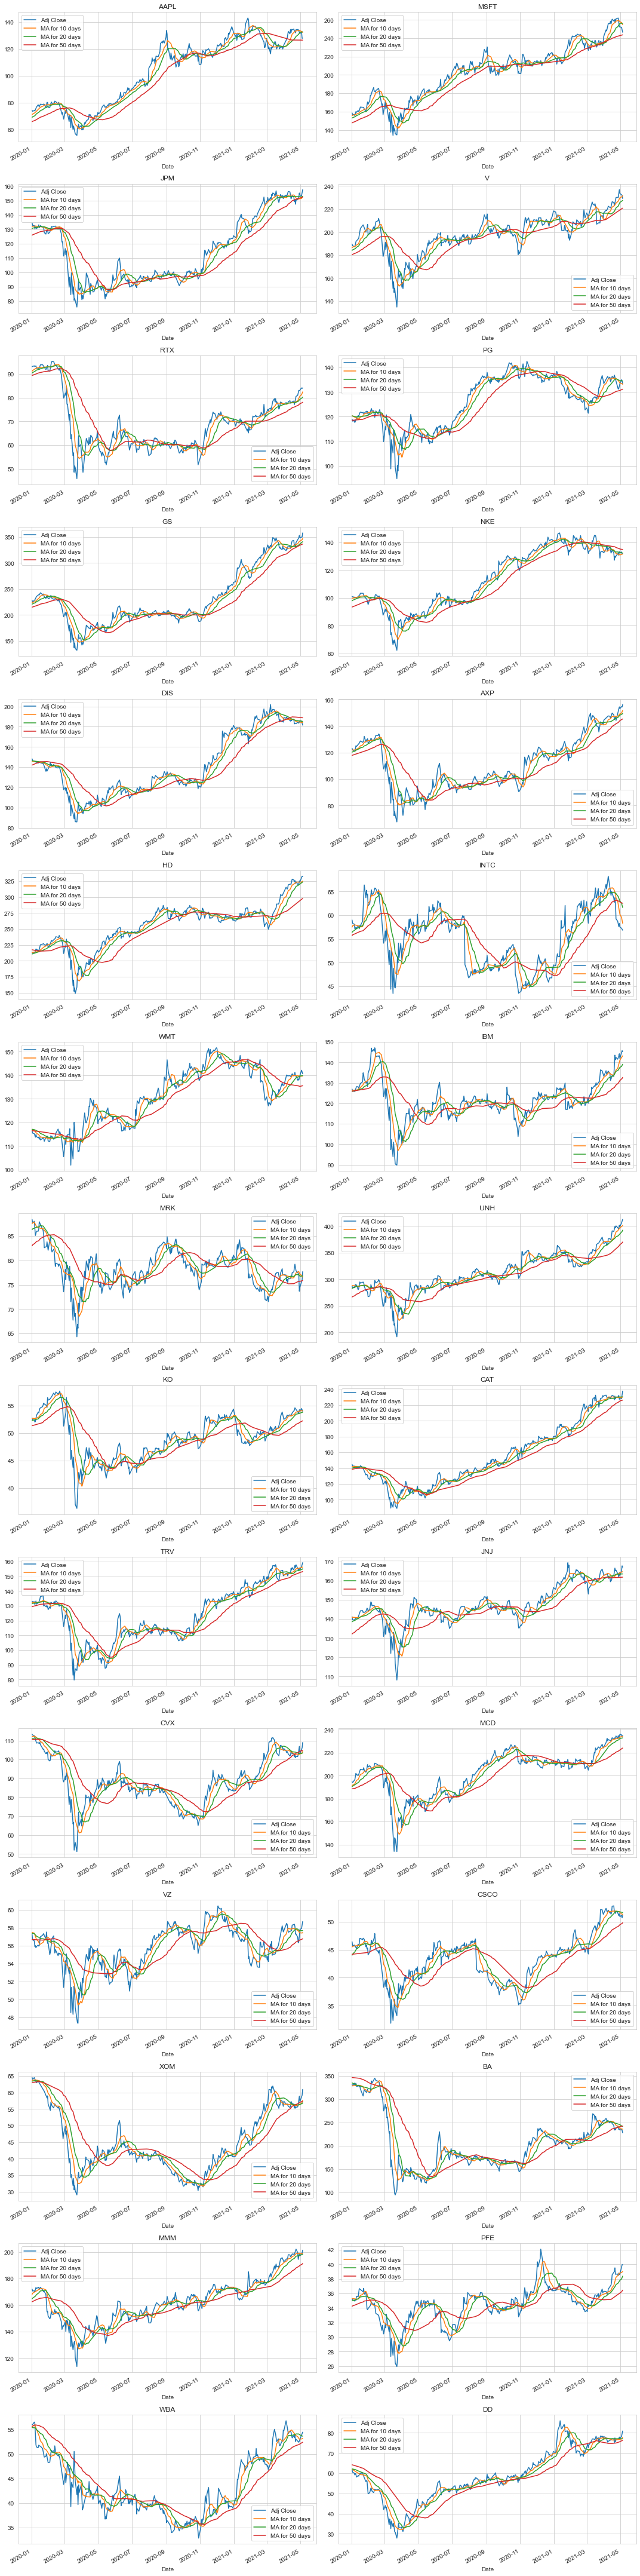

In [18]:
fig, axes = plt.subplots(nrows=nrows, ncols=2)
fig.set_figheight(4 * nrows)
fig.set_figwidth(15)

if len(tickers)>2:
    for i, ticker in enumerate(tickers):
        target_data[ticker][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[math.floor(i/2),i%2])
        axes[math.floor(i/2),i%2].set_title(ticker)
else:
    for i, ticker in enumerate(tickers):
        target_data[ticker][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i])
        axes[i].set_title(ticker)

fig.tight_layout()

# 3. Calculate the daily return for each stock in the data set

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

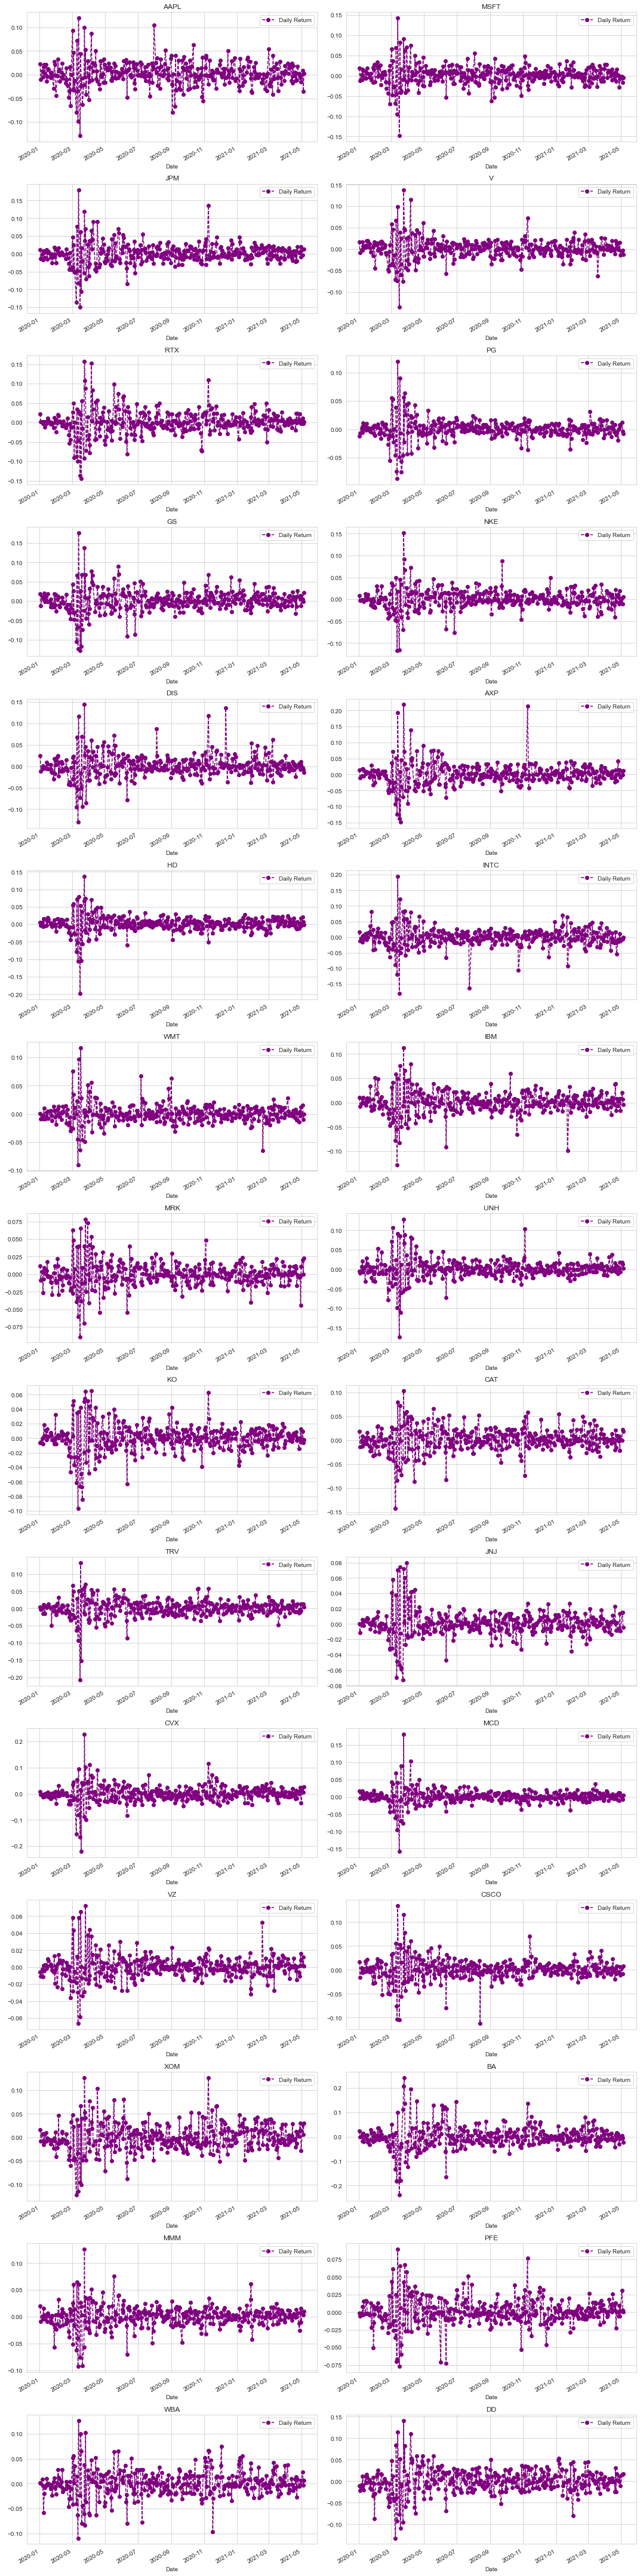

In [19]:
# We'll use pct_change to find the percent change for each day
for ticker in stock_index:
    stock_data[ticker]['Daily Return'] = stock_data[ticker]['Adj Close'].pct_change()

target_data = {}

for ticker in tickers:
    target_data[ticker] = stock_data[ticker].loc[start:end]       

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=nrows, ncols=2)
fig.set_figheight(4 * nrows)
fig.set_figwidth(15)

if len(tickers)>2:
    for i, ticker in enumerate(target_data):
        target_data[ticker]['Daily Return'].plot(ax=axes[math.floor(i/2),i%2], legend=True,color='purple', linestyle='--', marker='o')
        axes[math.floor(i/2),i%2].set_title(ticker)
else:
    for i, ticker in enumerate(target_data):
        target_data[ticker]['Daily Return'].plot(ax=axes[i], legend=True,color='purple', linestyle='--', marker='o')
        axes[i].set_title(ticker)

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

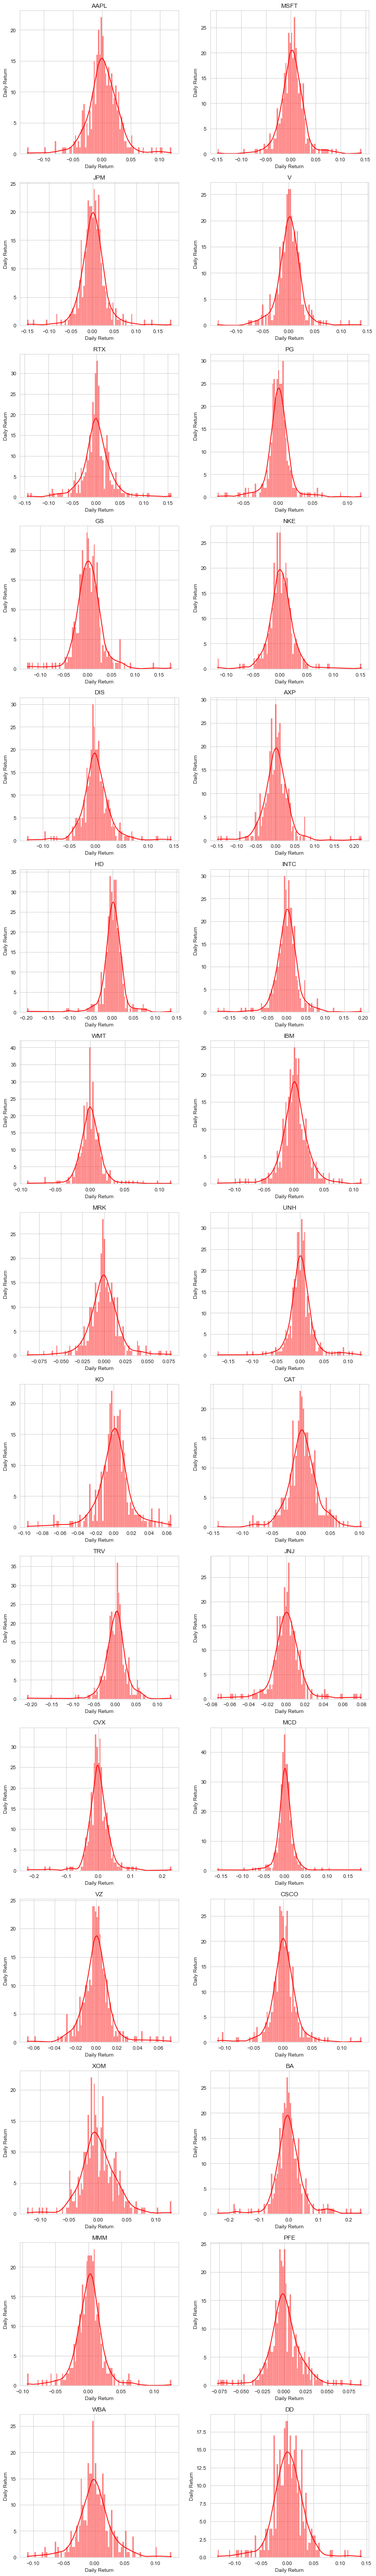

In [20]:
# dropna() is used here since NaN values can't be read by Seaborn
plt.figure(figsize=(12, 6*nrows))

for i, ticker in enumerate(target_data, 1):
    plt.subplot(nrows, 2, i)
    sns.histplot(data=target_data[ticker]['Daily Return'].dropna(),bins=100, kde=True,color='red')
    plt.ylabel('Daily Return')
    name = target_data[ticker].iloc[0]['Ticker']
    plt.title(f'{name}')

# 4. Determine correlations between different stock closing prices

In order to analyze the returns of our target data we will build a DataFrame with only the Adjusted Closing columns from each of the stock dataframes.

In [21]:
closing_df = DataReader(tickers, 'yahoo', start, end)['Adj Close']

closing_df

Symbols           AAPL        MSFT         JPM           V        RTX  \
Date                                                                    
2020-01-02   74.333511  158.571075  134.380966  189.656342  93.120224   
2020-01-03   73.610840  156.596588  132.607590  188.147980  93.247925   
2020-01-06   74.197395  157.001373  132.502167  187.741135  93.448586   
2020-01-07   73.848442  155.569855  130.249542  187.244965  93.150642   
2020-01-08   75.036385  158.047836  131.265610  190.450211  93.290482   
...                ...         ...         ...         ...        ...   
2021-04-29  133.479996  252.509995  155.190002  236.860001  82.870003   
2021-04-30  131.460007  252.179993  153.809998  233.559998  83.239998   
2021-05-03  132.539993  251.860001  153.360001  232.610001  84.139999   
2021-05-04  127.849998  247.789993  155.479996  232.029999  83.940002   
2021-05-05  128.100006  246.470001  157.520004  229.210007  84.129997   

Symbols             PG          GS         NKE         DIS         AXP  ...  \
Date                                                                    ...   
2020-01-02  118.952316  227.913971  101.029839  148.199997  123.267235  ...   
2020-01-03  118.152298  225.248886  100.753044  146.500000  122.042877  ...   
2020-01-06  118.316154  227.554092  100.664078  145.649994  121.513962  ...   
2020-01-07  117.583603  229.051987  100.614647  145.699997  120.877304  ...   
2020-01-08  118.084808  231.259933  100.387283  145.399994  122.963585  ...   
...                ...         ...         ...         ...         ...  ...   
2021-04-29  132.509995  352.970001  133.259995  185.330002  154.630005  ...   
2021-04-30  133.419998  348.450012  132.619995  186.020004  153.350006  ...   
2021-05-03  135.000000  350.160004  133.029999  185.509995  154.800003  ...   
2021-05-04  134.539993  349.839996  131.550003  184.250000  154.529999  ...   
2021-05-05  133.460007  357.619995  132.210007  181.509995  156.389999  ...   

Symbols            CVX         MCD         VZ       CSCO        XOM  \
Date                                                                  
2020-01-02  113.316681  194.704422  57.256145  46.443089  64.560120   
2020-01-03  112.924751  194.015961  56.646542  45.685341  64.041092   
2020-01-06  112.542137  196.197754  56.524620  45.848400  64.532799   
2020-01-07  111.105026  196.488678  55.896252  45.551056  64.004662   
2020-01-08  109.835899  199.669250  55.999416  45.579834  63.039452   
...                ...         ...        ...        ...        ...   
2021-04-29  106.900002  235.210007  57.320000  51.459999  58.939999   
2021-04-30  103.070000  236.080002  57.790001  50.910000  57.240002   
2021-05-03  105.529999  235.559998  57.919998  51.169998  58.820000   
2021-05-04  106.110001  233.860001  58.599998  50.709999  59.189999   
2021-05-05  108.959999  235.039993  58.689999  51.130001  60.970001   

Symbols             BA         MMM        PFE        WBA         DD  
Date                                                                 
2020-01-02  331.348572  172.119888  35.255142  56.046688  61.819908  
2020-01-03  330.791901  170.637741  35.065990  56.046688  60.515362  
2020-01-06  331.766083  170.800308  35.020950  56.530506  60.087002  
2020-01-07  335.285156  170.111816  34.903851  56.245903  59.162140  
2020-01-08  329.410095  172.722321  35.183086  52.963551  59.872826  
...                ...         ...        ...        ...        ...  
2021-04-29  235.940002  199.050003  38.599998  52.740002  77.919998  
2021-04-30  234.309998  197.139999  38.650002  53.099998  77.110001  
2021-05-03  235.190002  198.610001  39.830002  54.299999  78.279999  
2021-05-04  233.630005  199.380005  39.950001  54.119999  79.500000  
2021-05-05  228.179993  201.440002  39.970001  54.470001  80.919998  

[338 rows x 30 columns]

Now that we have all the closing prices in one dataframe, we can calculate the daily return for all the stocks.

In [22]:
target_returns = closing_df.pct_change()

target_returns

Symbols         AAPL      MSFT       JPM         V       RTX        PG  \
Date                                                                     
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-03 -0.009722 -0.012452 -0.013197 -0.007953  0.001371 -0.006726   
2020-01-06  0.007968  0.002585 -0.000795 -0.002162  0.002152  0.001387   
2020-01-07 -0.004703 -0.009118 -0.017001 -0.002643 -0.003188 -0.006191   
2020-01-08  0.016086  0.015928  0.007801  0.017118  0.001501  0.004263   
...              ...       ...       ...       ...       ...       ...   
2021-04-29 -0.000749 -0.008053  0.019444  0.014607 -0.002528  0.008447   
2021-04-30 -0.015133 -0.001307 -0.008892 -0.013932  0.004465  0.006867   
2021-05-03  0.008215 -0.001269 -0.002926 -0.004067  0.010812  0.011842   
2021-05-04 -0.035386 -0.016160  0.013824 -0.002493 -0.002377 -0.003407   
2021-05-05  0.001955 -0.005327  0.013121 -0.012154  0.002263 -0.008027   

Symbols           GS       NKE       DIS       AXP  ...       CVX       MCD  \
Date                                                ...                       
2020-01-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2020-01-03 -0.011693 -0.002740 -0.011471 -0.009933  ... -0.003459 -0.003536   
2020-01-06  0.010234 -0.000883 -0.005802 -0.004334  ... -0.003388  0.011245   
2020-01-07  0.006583 -0.000491  0.000343 -0.005239  ... -0.012770  0.001483   
2020-01-08  0.009640 -0.002260 -0.002059  0.017259  ... -0.011423  0.016187   
...              ...       ...       ...       ...  ...       ...       ...   
2021-04-29  0.013961  0.019509  0.010579  0.013701  ...  0.015967  0.012048   
2021-04-30 -0.012806 -0.004803  0.003723 -0.008278  ... -0.035828  0.003699   
2021-05-03  0.004907  0.003092 -0.002742  0.009455  ...  0.023867 -0.002203   
2021-05-04 -0.000914 -0.011125 -0.006792 -0.001744  ...  0.005496 -0.007217   
2021-05-05  0.022239  0.005017 -0.014871  0.012037  ...  0.026859  0.005046   

Symbols           VZ      CSCO       XOM        BA       MMM       PFE  \
Date                                                                     
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-03 -0.010647 -0.016316 -0.008039 -0.001680 -0.008611 -0.005365   
2020-01-06 -0.002152  0.003569  0.007678  0.002945  0.000953 -0.001284   
2020-01-07 -0.011117 -0.006485 -0.008184  0.010607 -0.004031 -0.003344   
2020-01-08  0.001846  0.000632 -0.015080 -0.017523  0.015346  0.008000   
...              ...       ...       ...       ...       ...       ...   
2021-04-29  0.015772  0.006848  0.014283  0.002039  0.015924 -0.005411   
2021-04-30  0.008200 -0.010688 -0.028843 -0.006909 -0.009596  0.001295   
2021-05-03  0.002249  0.005107  0.027603  0.003756  0.007457  0.030530   
2021-05-04  0.011740 -0.008990  0.006290 -0.006633  0.003877  0.003013   
2021-05-05  0.001536  0.008282  0.030073 -0.023328  0.010332  0.000501   

Symbols          WBA        DD  
Date                            
2020-01-02       NaN       NaN  
2020-01-03  0.000000 -0.021102  
2020-01-06  0.008632 -0.007079  
2020-01-07 -0.005035 -0.015392  
2020-01-08 -0.058357  0.012013  
...              ...       ...  
2021-04-29  0.006489  0.011291  
2021-04-30  0.006826 -0.010395  
2021-05-03  0.022599  0.015173  
2021-05-04 -0.003315  0.015585  
2021-05-05  0.006467  0.017862  

[338 rows x 30 columns]

Now we can compare the daily percentage return of two stocks to check how correlated they are. As you can see comparing a stock to itself should give you a perfectly linear relationship.

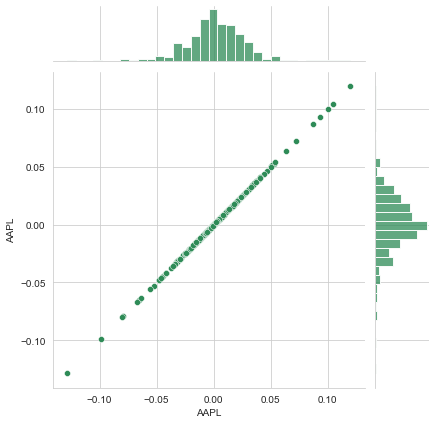

In [23]:
sns.jointplot(data=target_returns, x=tickers[0], y=tickers[0], kind='scatter', color='seagreen')

Select from the following tickers: ['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ', 'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']
Ticker X:AAPL
Ticker Y:V


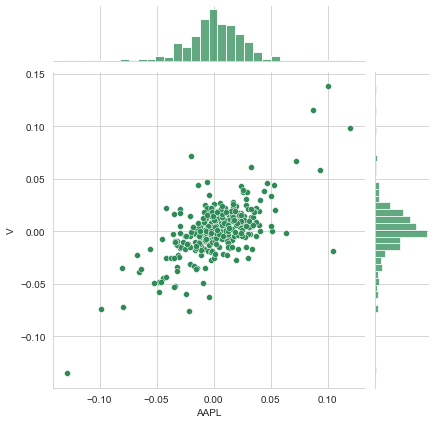

In [24]:
#Compare the daily percentage return of two stocks from the target data
x = input(f"Select from the following tickers: {tickers}\nTicker X:")

while x not in tickers:
    x = input("Ticker X:")
    
y = input("Ticker Y:")

while y not in tickers:
    y = input("Ticker Y:")
    
sns.jointplot(data=target_returns, x=x, y=y, kind='scatter', color='seagreen')

Now we have a better visualization of when stocks have a perfect positive correlation compared to a more realistic scenario where they have a less linear relationship bewteen the daily return values. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our target stock ticker list. We can use sns.pairplot() to automatically create this plot. The diagonal displays the histogram of a stock's returns normalized on a scale from [-1,1]. Depending on the size of the index used this step could take a while to process.

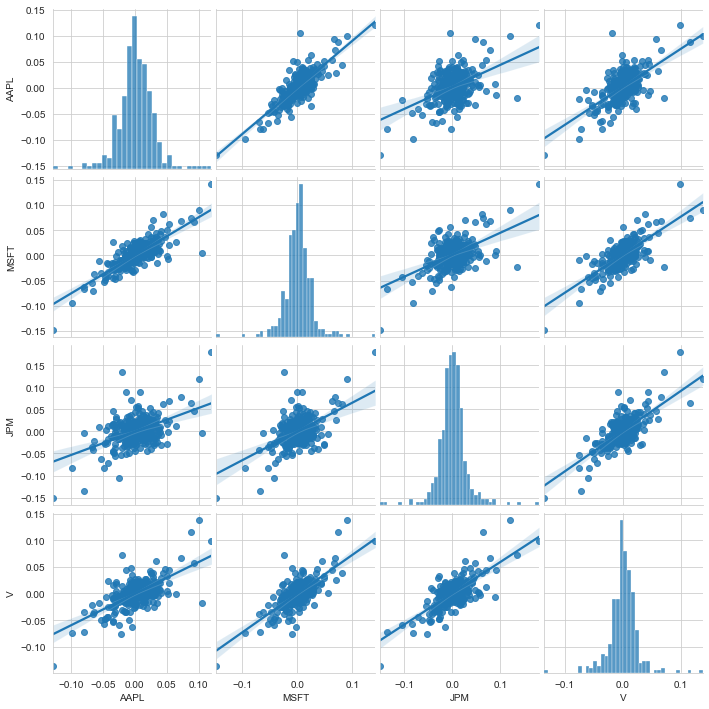

In [32]:
sns.pairplot(target_returns, kind='reg')

Above we can see all the relationships on daily returns between all the stocks in our target dataset. By using this data you can find correlations between different stocks. Next we will make use of sns.PairGrid() to provide further visualizations of this data.

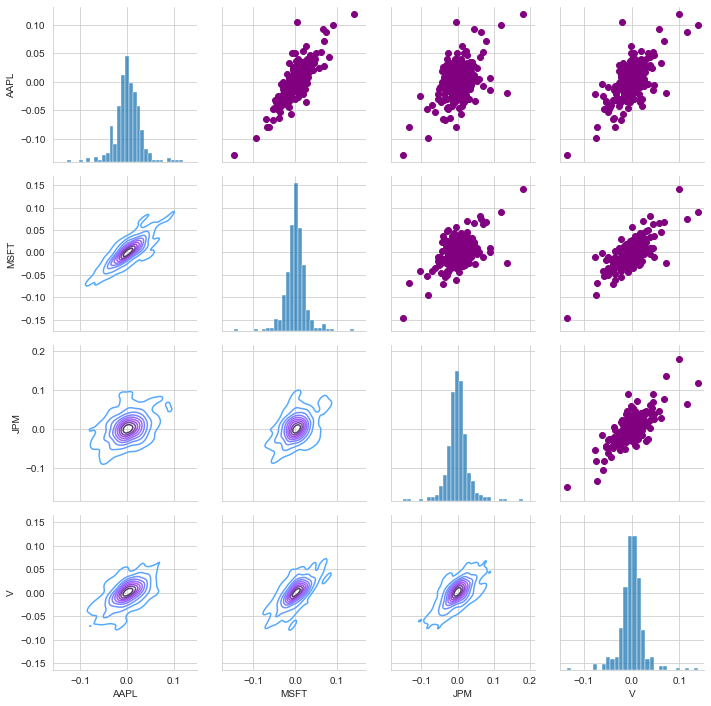

In [39]:
# Using dropna() for Seaborn
return_fig = sns.PairGrid(target_returns.dropna())

# Using map_upper we can specify what the upper triangle portion of the matrix will look like in our figure.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle of the matrix in the figure, including the plot type (kdeplot) 
# or the color map (cmap)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# The diagonal will be a series of histogram plots of the daily return
return_fig.map_diag(sns.histplot, bins=30)

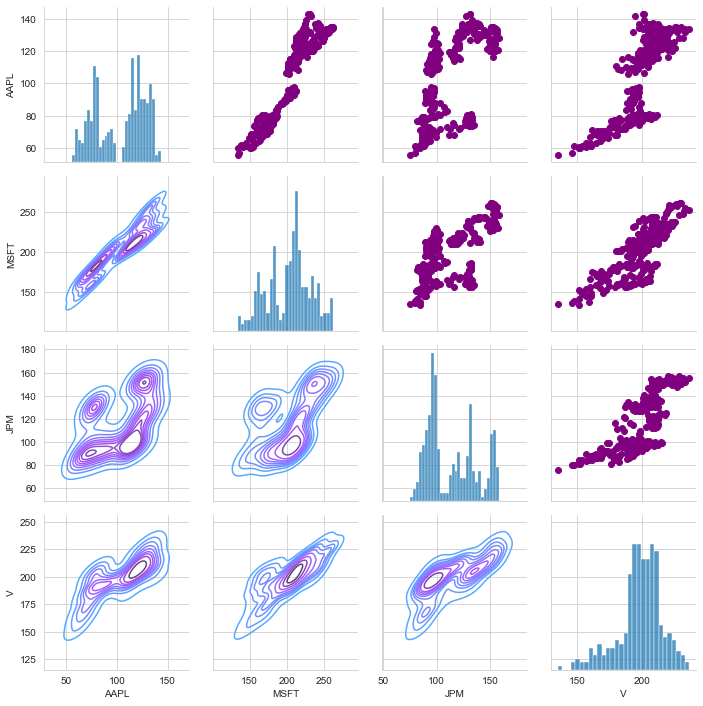

In [41]:
# Repeat for the closing prices
return_fig = sns.PairGrid(closing_df.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(sns.histplot, bins=30)

We can also do a correlation plot to get the actual numerical values for the correlation between the stocks' daily return values as well as the closing values from our dataframe of closing values.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

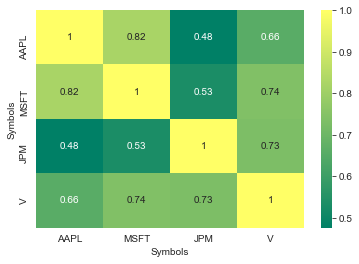

In [44]:
sns.heatmap(target_returns.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

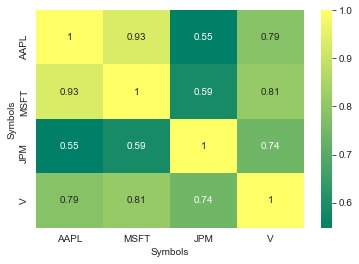

In [45]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Through the visualization of all this data as well as the numerical outputs, one can determine relationships between stocks and potentially use this information during training of a machine learning algorithm or even as metrics for the users to consider.

# 5. Visualize risk against expected return for investing in a particular stock

There are many ways we can quantify risk, however one of the easiest ways utilizes the information we've already gathered on daily percentage returns. It takes this data and compares it to the expected return with the standard deviation of the daily returns.

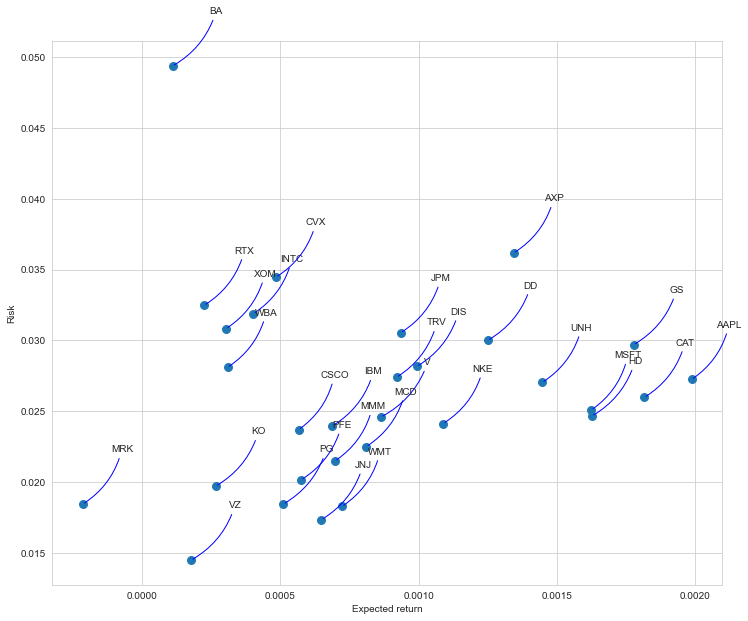

In [37]:
# Let's start by defining a new DataFrame as a clenaed version of the original traget_data Dataframe.
rets = target_returns.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.2'))

# 6. Predicting the closing stock price for a selected stock

We again begin by importing all of the tools and libraries we will need

In [175]:
from finrl.config import config
from finrl.marketdata.yahoodownloader import YahooDownloader
from finrl.preprocessing.preprocessors import FeatureEngineer
from finrl.preprocessing.data import data_split

from finrl.model.models import DRLAgent
from finrl.trade.backtest import backtest_stats, backtest_plot, get_daily_return, get_baseline,convert_daily_return_to_pyfolio_ts

import sys
sys.path.append("../Portfolio-Pal")

# Create folders for storing results and models
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

The FinRL library utilizes a specific type of formatting so we will reload our data from above using the same data range, but making use of their custom YahooDownloader method that uses the same Yahoo Finance API information as above.

In [176]:
data = {}

# Adjust the values of start and end for data %Y-%m-%d
start = '2011-01-01'
end =  '2021-04-30'

yd = YahooDownloader(start_date = start, end_date = end, ticker_list = stock_index)
df = yd.fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In order to train our models we must first preprocess our data. This ensures that our machine learning model will be able to train efficiently and effectively. Most importantly we would like to add some extra features on to our dataset so that we can have extra indicators for when to buy, sell or hold. Metrics such as MACD and RSI are also used in practical stock trading which makes sense since humans need more than just the price movement to make decisions and so should our AI. Additionally, we will need to create a covariance matrix to represent our state space. One final important note is that FeatureEngineer consumes the first year of your date range to make the technical indicator features so if you need those dates in your range move back the start date by about 1 year. If you plan on using the backtesting features you will also need your trained models to trade using atleast 1 year of data

In [177]:
# Perform Feature Engineering:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    use_turbulence=False,
                    user_defined_feature = False)

df = fe.preprocess_data(df)

# add covariance matrix as states
df = df.sort_values(['date','tic'],ignore_index=True)
df.index = df.date.factorize()[0]

cov_list = []
# look back is one year which is 252 trading days
lookback=252
for i in range(lookback,len(df.index.unique())):
    data_lookback = df.loc[i-lookback:i,:]
    price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
    return_lookback = price_lookback.pct_change().dropna()
    covs = return_lookback.cov().values
    cov_list.append(covs)

df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list})
df = df.merge(df_cov, on='date')
df = df.sort_values(['date','tic']).reset_index(drop=True)
df.head()

Successfully added technical indicators


date       open       high        low      close     volume   tic  \
0  2012-01-03  14.621429  14.732143  14.607143  12.650659  302220800  AAPL   
1  2012-01-03  48.299999  48.959999  48.139999  42.083332    6955400   AXP   
2  2012-01-03  74.699997  75.000000  74.120003  60.731094    6859300    BA   
3  2012-01-03  92.769997  95.110001  92.769997  71.749046    8177000   CAT   
4  2012-01-03  18.549999  18.860001  18.480000  14.035937   41236600  CSCO   

   day      macd    boll_ub    boll_lb     rsi_30      cci_30      dx_30  \
0    1  0.167856  12.709076  11.547964  57.530713  151.557503  32.770714   
1    1 -0.045873  42.862240  40.061684  51.463777   95.574231   9.417737   
2    1  1.428188  61.638848  56.327736  59.259391  105.150272  37.149880   
3    1 -0.112173  74.541872  65.433659  53.066237   53.903577   6.804549   
4    1  0.033156  14.334774  13.246114  54.576879   82.845130  17.655790   

   close_30_sma  close_60_sma  \
0     11.941481     12.091389   
1     41.111341     41.701702   
2     57.425605     55.191454   
3     70.135365     69.323163   
4     13.716830     13.569252   

                                            cov_list  
0  [[0.0002726661263954252, 0.0001769807040221934...  
1  [[0.0002726661263954252, 0.0001769807040221934...  
2  [[0.0002726661263954252, 0.0001769807040221934...  
3  [[0.0002726661263954252, 0.0001769807040221934...  
4  [[0.0002726661263954252, 0.0001769807040221934...

# Model Training

In [178]:
# Choose the date to begin testing the model on test data
train_start = start
train_end = '2020-01-01'

train = data_split(df, train_start, train_end)

stock_dimension = len(train.tic.unique())
state_space = stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")
train

Stock Dimension: 30, State Space: 30


date        open        high         low       close     volume  \
0     2012-01-03   14.621429   14.732143   14.607143   12.650659  302220800   
0     2012-01-03   48.299999   48.959999   48.139999   42.083332    6955400   
0     2012-01-03   74.699997   75.000000   74.120003   60.731094    6859300   
0     2012-01-03   92.769997   95.110001   92.769997   71.749046    8177000   
0     2012-01-03   18.549999   18.860001   18.480000   14.035937   41236600   
...          ...         ...         ...         ...         ...        ...   
2011  2019-12-31  187.059998  188.000000  186.539993  186.461014    5273000   
2011  2019-12-31   61.209999   61.400002   60.939999   57.584396    8466700   
2011  2019-12-31   58.820000   59.470001   58.810001   55.932842    3305100   
2011  2019-12-31  119.500000  119.800003  118.190002  116.402725    4912000   
2011  2019-12-31   69.019997   69.800003   69.010002   63.540272   13151800   

       tic  day      macd     boll_ub     boll_lb     rsi_30      cci_30  \
0     AAPL    1  0.167856   12.709076   11.547964  57.530713  151.557503   
0      AXP    1 -0.045873   42.862240   40.061684  51.463777   95.574231   
0       BA    1  1.428188   61.638848   56.327736  59.259391  105.150272   
0      CAT    1 -0.112173   74.541872   65.433659  53.066237   53.903577   
0     CSCO    1  0.033156   14.334774   13.246114  54.576879   82.845130   
...    ...  ...       ...         ...         ...        ...         ...   
2011     V    1  2.059343  189.241952  178.089214  58.615956   96.646421   
2011    VZ    1  0.307623   58.090377   56.566341  56.217642   59.380044   
2011   WBA    1  0.001029   56.550828   54.267549  54.048351   -6.456034   
2011   WMT    1  0.142574  118.586665  115.534257  51.363989  -65.436599   
2011   XOM    1  0.214246   64.472570   62.113518  51.169135   31.431572   

          dx_30  close_30_sma  close_60_sma  \
0     32.770714     11.941481     12.091389   
0      9.417737     41.111341     41.701702   
0     37.149880     57.425605     55.191454   
0      6.804549     70.135365     69.323163   
0     17.655790     13.716830     13.569252   
...         ...           ...           ...   
2011  12.589647    182.567723    179.111192   
2011   8.866464     56.893194     56.606750   
2011  16.194864     56.077992     54.756432   
2011   0.487171    116.841202    116.458123   
2011  10.358007     63.026698     62.720739   

                                               cov_list  
0     [[0.0002726661263954252, 0.0001769807040221934...  
0     [[0.0002726661263954252, 0.0001769807040221934...  
0     [[0.0002726661263954252, 0.0001769807040221934...  
0     [[0.0002726661263954252, 0.0001769807040221934...  
0     [[0.0002726661263954252, 0.0001769807040221934...  
...                                                 ...  
2011  [[0.00027111622562027275, 9.794512047450785e-0...  
2011  [[0.00027111622562027275, 9.794512047450785e-0...  
2011  [[0.00027111622562027275, 9.794512047450785e-0...  
2011  [[0.00027111622562027275, 9.794512047450785e-0...  
2011  [[0.00027111622562027275, 9.794512047450785e-0...  

[60360 rows x 17 columns]

In [179]:
trade_start = train_end
trade_end = end
trade = data_split(df,trade_start, trade_end)
trade

date        open        high         low       close     volume  \
0    2020-01-02   74.059998   75.150002   73.797501   74.333511  135480400   
0    2020-01-02  124.660004  126.269997  124.230003  123.267235    2708000   
0    2020-01-02  328.549988  333.350006  327.700012  331.348572    4544400   
0    2020-01-02  149.000000  150.550003  147.979996  144.700500    3311900   
0    2020-01-02   48.060001   48.419998   47.880001   46.443089   16708100   
..          ...         ...         ...         ...         ...        ...   
333  2021-04-29  235.229996  237.500000  233.149994  236.860001    7411400   
333  2021-04-29   56.549999   57.520000   56.529999   57.320000   18169200   
333  2021-04-29   52.299999   53.029999   52.119999   52.740002    4004300   
333  2021-04-29  137.899994  140.000000  137.899994  139.630005    6532000   
333  2021-04-29   58.919998   59.480000   58.150002   58.939999   27318400   

      tic  day      macd     boll_ub     boll_lb     rsi_30      cci_30  \
0    AAPL    3  2.164947   74.253085   63.939689  76.464783  176.846461   
0     AXP    3  1.446402  125.179213  115.387616  59.231309   98.021637   
0      BA    3 -7.198674  354.759862  316.044056  44.297973  -77.659006   
0     CAT    3  1.673340  145.405778  134.858327  61.562693  146.231471   
0    CSCO    3  0.656620   47.413694   40.635148  57.069802  128.712029   
..    ...  ...       ...         ...         ...        ...         ...   
333     V    3  4.525468  235.668119  214.216880  64.289410  159.176979   
333    VZ    3  0.060413   58.914845   56.406720  52.059069  -40.950313   
333   WBA    3  0.034241   56.394559   51.580442  53.816136  -59.763635   
333   WMT    3  0.815727  141.890337  136.987664  52.556294   41.763422   
333   XOM    3  0.248555   58.336009   54.524991  59.192877  241.824938   

         dx_30  close_30_sma  close_60_sma  \
0    58.795784     67.865044     64.491774   
0    28.072591    118.966889    117.214048   
0    26.889830    345.004659    349.218463   
0    26.046421    139.494887    135.706537   
0    31.144780     43.649012     44.224824   
..         ...           ...           ...   
333  46.206482    220.342332    217.052485   
333   2.304692     57.376464     56.238332   
333   0.757383     53.546000     51.564009   
333  13.196245    137.577667    136.650331   
333  25.183657     56.439667     55.810117   

                                              cov_list  
0    [[0.0002727174212454991, 9.902128264928234e-05...  
0    [[0.0002727174212454991, 9.902128264928234e-05...  
0    [[0.0002727174212454991, 9.902128264928234e-05...  
0    [[0.0002727174212454991, 9.902128264928234e-05...  
0    [[0.0002727174212454991, 9.902128264928234e-05...  
..                                                 ...  
333  [[0.0004851346605762478, 3.446460765994228e-05...  
333  [[0.0004851346605762478, 3.446460765994228e-05...  
333  [[0.0004851346605762478, 3.446460765994228e-05...  
333  [[0.0004851346605762478, 3.446460765994228e-05...  
333  [[0.0004851346605762478, 3.446460765994228e-05...  

[10020 rows x 17 columns]

### Environment for Portfolio Allocation

In [180]:
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
from stable_baselines3.common.vec_env import DummyVecEnv


class Environment(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, 
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                turbulence_threshold=None,
                lookback=252,
                day = 0):

        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list

        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,)) 
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False     
        self.turbulence_threshold = turbulence_threshold        
        # initalize state
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]]

        
    def step(self, actions):
        self.terminal = self.day >= len(self.df.index.unique())-1

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()
            
            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))           
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")
            
            return self.state, self.reward, self.terminal,{}

        else:
            weights = self.softmax_normalization(actions) 
            self.actions_memory.append(weights)
            last_day_memory = self.data

            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])            
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value 
        
        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        self.terminal = False 
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]] 
        return self.state
    
    def render(self, mode='human'):
        return self.state
        
    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output

    
    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']
        
        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

We start off with \\$1000 and the max amount of stocks we're allowed to trade is also set to 100. We also arbitrarily set the transaction cost to \\$0.01 to simulate some kind of fee, but this can be adjusted to any value based on the user's needs. Finally we have our technical indicators list determined in the config class.

In [181]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000, 
    "transaction_cost_pct": 0.01, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4
}

e_train_gym = Environment(df = train, **env_kwargs)

In [182]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


### Implement DRL Algorithms

### Model 1: **A2C**


In [183]:
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0003}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0003}
Using cpu device


In [184]:
trained_a2c = agent.train_model(model=model_a2c, 
                                tb_log_name='a2c',
                                total_timesteps=50000)

Logging to tensorboard_log/a2c\a2c_9
------------------------------------
| time/                 |          |
|    fps                | 541      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -42.5    |
|    explained_variance | 1.55e-06 |
|    learning_rate      | 0.0003   |
|    n_updates          | 99       |
|    policy_loss        | 1.92e+05 |
|    std                | 0.999    |
|    value_loss         | 2.38e+07 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 552      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -42.6    |
|    explained_variance | 6.56e-06 |
|    learning_rate      | 0.0003   |
|    n_updates          | 199      |
|

------------------------------------
| time/                 |          |
|    fps                | 507      |
|    iterations         | 1500     |
|    time_elapsed       | 14       |
|    total_timesteps    | 7500     |
| train/                |          |
|    entropy_loss       | -42.4    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0003   |
|    n_updates          | 1499     |
|    policy_loss        | 3.05e+05 |
|    std                | 0.994    |
|    value_loss         | 6.12e+07 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 508      |
|    iterations         | 1600     |
|    time_elapsed       | 15       |
|    total_timesteps    | 8000     |
| train/                |          |
|    entropy_loss       | -42.4    |
|    explained_variance | 0        |
|    learning_rate      | 0.0003   |
|    n_updates          | 1599     |
|    policy_loss        | 3.99e+05 |
|

begin_total_asset:1000
end_total_asset:3087.5058515497713
Sharpe:  1.2052792509618135
------------------------------------
| time/                 |          |
|    fps                | 502      |
|    iterations         | 2900     |
|    time_elapsed       | 28       |
|    total_timesteps    | 14500    |
| train/                |          |
|    entropy_loss       | -42.2    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0003   |
|    n_updates          | 2899     |
|    policy_loss        | 1.54e+05 |
|    std                | 0.988    |
|    value_loss         | 1.83e+07 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 503      |
|    iterations         | 3000     |
|    time_elapsed       | 29       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -42.2    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 

------------------------------------
| time/                 |          |
|    fps                | 503      |
|    iterations         | 4300     |
|    time_elapsed       | 42       |
|    total_timesteps    | 21500    |
| train/                |          |
|    entropy_loss       | -42      |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0003   |
|    n_updates          | 4299     |
|    policy_loss        | 2.63e+05 |
|    std                | 0.981    |
|    value_loss         | 5.12e+07 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 503      |
|    iterations         | 4400     |
|    time_elapsed       | 43       |
|    total_timesteps    | 22000    |
| train/                |          |
|    entropy_loss       | -42      |
|    explained_variance | 0        |
|    learning_rate      | 0.0003   |
|    n_updates          | 4399     |
|    policy_loss        | 3.75e+05 |
|

begin_total_asset:1000
end_total_asset:3151.780572977222
Sharpe:  1.2342314197617366
------------------------------------
| time/                 |          |
|    fps                | 497      |
|    iterations         | 5700     |
|    time_elapsed       | 57       |
|    total_timesteps    | 28500    |
| train/                |          |
|    entropy_loss       | -41.7    |
|    explained_variance | 1.79e-07 |
|    learning_rate      | 0.0003   |
|    n_updates          | 5699     |
|    policy_loss        | 1.59e+05 |
|    std                | 0.971    |
|    value_loss         | 1.82e+07 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 498       |
|    iterations         | 5800      |
|    time_elapsed       | 58        |
|    total_timesteps    | 29000     |
| train/                |           |
|    entropy_loss       | -41.6     |
|    explained_variance | -1.19e-07 |
|    learning_rate

------------------------------------
| time/                 |          |
|    fps                | 498      |
|    iterations         | 7100     |
|    time_elapsed       | 71       |
|    total_timesteps    | 35500    |
| train/                |          |
|    entropy_loss       | -41.5    |
|    explained_variance | 0        |
|    learning_rate      | 0.0003   |
|    n_updates          | 7099     |
|    policy_loss        | 2.64e+05 |
|    std                | 0.965    |
|    value_loss         | 4.98e+07 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 498      |
|    iterations         | 7200     |
|    time_elapsed       | 72       |
|    total_timesteps    | 36000    |
| train/                |          |
|    entropy_loss       | -41.4    |
|    explained_variance | 0        |
|    learning_rate      | 0.0003   |
|    n_updates          | 7199     |
|    policy_loss        | 3.39e+05 |
|

begin_total_asset:1000
end_total_asset:3063.8977176754483
Sharpe:  1.213039439280211
------------------------------------
| time/                 |          |
|    fps                | 495      |
|    iterations         | 8500     |
|    time_elapsed       | 85       |
|    total_timesteps    | 42500    |
| train/                |          |
|    entropy_loss       | -41.4    |
|    explained_variance | 0        |
|    learning_rate      | 0.0003   |
|    n_updates          | 8499     |
|    policy_loss        | 1.44e+05 |
|    std                | 0.961    |
|    value_loss         | 1.43e+07 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 495       |
|    iterations         | 8600      |
|    time_elapsed       | 86        |
|    total_timesteps    | 43000     |
| train/                |           |
|    entropy_loss       | -41.4     |
|    explained_variance | -2.38e-07 |
|    learning_rate

------------------------------------
| time/                 |          |
|    fps                | 494      |
|    iterations         | 9900     |
|    time_elapsed       | 100      |
|    total_timesteps    | 49500    |
| train/                |          |
|    entropy_loss       | -41.1    |
|    explained_variance | 0        |
|    learning_rate      | 0.0003   |
|    n_updates          | 9899     |
|    policy_loss        | 2.18e+05 |
|    std                | 0.952    |
|    value_loss         | 3.82e+07 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 494       |
|    iterations         | 10000     |
|    time_elapsed       | 101       |
|    total_timesteps    | 50000     |
| train/                |           |
|    entropy_loss       | -41       |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0003    |
|    n_updates          | 9999      |
|    policy_loss        | 3

### Model 2: **PPO**


In [185]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [186]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=80000)

Logging to tensorboard_log/ppo\ppo_7
begin_total_asset:1000
end_total_asset:3322.8568132676633
Sharpe:  1.2693690265940314
-----------------------------
| time/              |      |
|    fps             | 791  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
begin_total_asset:1000
end_total_asset:3047.855295602787
Sharpe:  1.1865844745085168
--------------------------------------------
| time/                   |                |
|    fps                  | 716            |
|    iterations           | 2              |
|    time_elapsed         | 5              |
|    total_timesteps      | 4096           |
| train/                  |                |
|    approx_kl            | -3.3569522e-05 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -42.6          |
|    explained_variance   | -1.86e-05      |
|    learning_rate        | 0.0001        

begin_total_asset:1000
end_total_asset:3394.607522456507
Sharpe:  1.288714642149868
-------------------------------------------
| time/                   |               |
|    fps                  | 664           |
|    iterations           | 10            |
|    time_elapsed         | 30            |
|    total_timesteps      | 20480         |
| train/                  |               |
|    approx_kl            | 0.00011215918 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -42.6         |
|    explained_variance   | 2.38e-07      |
|    learning_rate        | 0.0001        |
|    loss                 | 5.56e+08      |
|    n_updates            | 90            |
|    policy_gradient_loss | -0.000697     |
|    std                  | 1             |
|    value_loss           | 1.14e+09      |
-------------------------------------------
begin_total_asset:1000
end_total_asset:3201.581440099518
Sharpe:  1.234521007560

begin_total_asset:1000
end_total_asset:3293.432542151375
Sharpe:  1.2595241346078794
-------------------------------------------
| time/                   |               |
|    fps                  | 658           |
|    iterations           | 19            |
|    time_elapsed         | 59            |
|    total_timesteps      | 38912         |
| train/                  |               |
|    approx_kl            | -4.087761e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -42.6         |
|    explained_variance   | 5.96e-08      |
|    learning_rate        | 0.0001        |
|    loss                 | 5.49e+08      |
|    n_updates            | 180           |
|    policy_gradient_loss | -0.000696     |
|    std                  | 1             |
|    value_loss           | 1.13e+09      |
-------------------------------------------
begin_total_asset:1000
end_total_asset:3218.9043094905915
Sharpe:  1.2424624037

begin_total_asset:1000
end_total_asset:3327.3601309183723
Sharpe:  1.270017266951128
--------------------------------------------
| time/                   |                |
|    fps                  | 656            |
|    iterations           | 28             |
|    time_elapsed         | 87             |
|    total_timesteps      | 57344          |
| train/                  |                |
|    approx_kl            | -0.00018647686 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -42.6          |
|    explained_variance   | 1.19e-07       |
|    learning_rate        | 0.0001         |
|    loss                 | 6.6e+08        |
|    n_updates            | 270            |
|    policy_gradient_loss | -0.000658      |
|    std                  | 1              |
|    value_loss           | 1.27e+09       |
--------------------------------------------
begin_total_asset:1000
end_total_asset:3423.71816264654
Shar

begin_total_asset:1000
end_total_asset:3218.8643447844033
Sharpe:  1.2350538668415492
--------------------------------------------
| time/                   |                |
|    fps                  | 656            |
|    iterations           | 37             |
|    time_elapsed         | 115            |
|    total_timesteps      | 75776          |
| train/                  |                |
|    approx_kl            | -4.7266483e-05 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -42.6          |
|    explained_variance   | 5.96e-08       |
|    learning_rate        | 0.0001         |
|    loss                 | 6.03e+08       |
|    n_updates            | 360            |
|    policy_gradient_loss | -0.000606      |
|    std                  | 1              |
|    value_loss           | 1.16e+09       |
--------------------------------------------
begin_total_asset:1000
end_total_asset:3205.3593789089314
S

### Model 3: **SAC**


In [187]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0003,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0003, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


In [188]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=50000)

Logging to tensorboard_log/sac\sac_5
begin_total_asset:1000
end_total_asset:3266.3551579376776
Sharpe:  1.2370566492771944
begin_total_asset:1000
end_total_asset:3234.5522043949377
Sharpe:  1.2236519979222353
begin_total_asset:1000
end_total_asset:3282.661132106884
Sharpe:  1.2490036784806138
begin_total_asset:1000
end_total_asset:3163.6010824527925
Sharpe:  1.2142980424914167
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 40        |
|    time_elapsed    | 196       |
|    total timesteps | 8048      |
| train/             |           |
|    actor_loss      | -5.87e+04 |
|    critic_loss     | 2.97e+05  |
|    ent_coef        | 0.39      |
|    ent_coef_loss   | 1.24      |
|    learning_rate   | 0.0003    |
|    n_updates       | 7947      |
----------------------------------
begin_total_asset:1000
end_total_asset:3301.972940319222
Sharpe:  1.2443002205628324
begin_total_asset:1000
end_total_asset:3295.6

### Model 4: TD3

In [189]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 64, "buffer_size": 100000, "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 64, 'buffer_size': 100000, 'learning_rate': 0.001}
Using cpu device


In [190]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=50000)

Logging to tensorboard_log/td3\td3_3
begin_total_asset:1000
end_total_asset:3197.4946522524788
Sharpe:  1.2323505935308523
begin_total_asset:1000
end_total_asset:3137.6369960590164
Sharpe:  1.2036614044273215
begin_total_asset:1000
end_total_asset:3137.6369960590164
Sharpe:  1.2036614044273215
begin_total_asset:1000
end_total_asset:3137.6369960590164
Sharpe:  1.2036614044273215
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 82        |
|    time_elapsed    | 97        |
|    total timesteps | 8048      |
| train/             |           |
|    actor_loss      | -2.21e+04 |
|    critic_loss     | 8.42e+05  |
|    learning_rate   | 0.001     |
|    n_updates       | 6036      |
----------------------------------
begin_total_asset:1000
end_total_asset:3137.6369960590164
Sharpe:  1.2036614044273215
begin_total_asset:1000
end_total_asset:3137.6369960590164
Sharpe:  1.2036614044273215
begin_total_asset:1000
end_

## Trading Simulation
For this scenario we give our agent $1,000 initial capital starting from 2020-01-01 to present, however we can adjust this to any date desired. We can now choose one of our models to trade Dow jones 30 stocks in this scenario.

In [210]:
models = ['A2C', 'PPO', 'SAC', 'TD3']

user_input =''

while user_input not in models:
    user_input = input(f"Choose a model {models}:")
    
if user_input == 'A2C':
    model=trained_a2c
elif user_input == 'PPO':
    model=trained_ppo
elif user_input == 'SAC':
    model=trained_sac
else:
    model=trained_td3
    
e_trade_gym = Environment(df = trade, **env_kwargs)
df_daily_return, df_actions = DRLAgent.DRL_prediction(model=model, environment = e_trade_gym)

Choose a model ['A2C', 'PPO', 'SAC', 'TD3']:SAC
begin_total_asset:1000
end_total_asset:1265.7691256028338
Sharpe:  0.7185878068053665
hit end!


In [221]:
df_daily_return.head()

date  daily_return
0  2020-01-02      0.000000
1  2020-01-03     -0.008049
2  2020-01-06      0.001461
3  2020-01-07     -0.006340
4  2020-01-08      0.004528

### View trade action
This isn't a perfect way to follow along with the trading bot, but you are able to see the last few days of trading action.

In [222]:
df_actions.tail()

AAPL       AXP        BA       CAT      CSCO       CVX  \
date                                                                     
2021-04-23  0.020570  0.019059  0.031064  0.051333  0.019032  0.019274   
2021-04-26  0.019492  0.019366  0.043173  0.051337  0.018993  0.019113   
2021-04-27  0.023157  0.019300  0.045565  0.048285  0.018869  0.019184   
2021-04-28  0.029844  0.019183  0.048223  0.051395  0.019067  0.019194   
2021-04-29  0.028454  0.019627  0.047450  0.050793  0.019612  0.019590   

                  DD       DIS        GS        HD  ...       PFE        PG  \
date                                                ...                       
2021-04-23  0.051002  0.019022  0.019103  0.050125  ...  0.051334  0.019903   
2021-04-26  0.051038  0.019258  0.029301  0.050701  ...  0.050891  0.019113   
2021-04-27  0.050657  0.018973  0.023875  0.051089  ...  0.050792  0.019123   
2021-04-28  0.051459  0.019149  0.019733  0.049593  ...  0.051121  0.019810   
2021-04-29  0.051041  0.019629  0.024720  0.053088  ...  0.052889  0.020030   

                 RTX       TRV       UNH         V        VZ       WBA  \
date                                                                     
2021-04-23  0.051506  0.048416  0.023040  0.048992  0.022137  0.019033   
2021-04-26  0.051273  0.040050  0.021047  0.050131  0.028830  0.019112   
2021-04-27  0.050954  0.045572  0.019615  0.050227  0.044237  0.019336   
2021-04-28  0.047867  0.048854  0.019475  0.048363  0.045207  0.021080   
2021-04-29  0.052861  0.045611  0.019977  0.051057  0.029795  0.022190   

                 WMT       XOM  
date                            
2021-04-23  0.020236  0.019302  
2021-04-26  0.019187  0.019169  
2021-04-27  0.021329  0.019118  
2021-04-28  0.019498  0.020889  
2021-04-29  0.022978  0.020671  

[5 rows x 30 columns]

In [215]:
df_actions.to_csv('df_actions.csv')

#  7. Backtesting on Various models
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

### Backtesting Statitics
pass in df_account_value, this information is stored in env class


In [216]:
from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func( returns=DRL_strat, 
                              factor_returns=DRL_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")

In [217]:
print("==============DRL Strategy Stats===========")
perf_stats_all

==============DRL Strategy Stats===========


Annual return          0.194608
Cumulative returns     0.265769
Annual volatility      0.318072
Sharpe ratio           0.718588
Calmar ratio           0.554435
Stability              0.657821
Max drawdown          -0.351003
Omega ratio            1.160071
Sortino ratio          1.021969
Skew                  -0.262903
Kurtosis               8.927518
Tail ratio             0.879984
Daily value at risk   -0.039166
Alpha                  0.000000
Beta                   1.000000
dtype: float64


### Backtesting Plotted Metrics
Ensure that there is at least 1 year of trading action otherwise the graphs will not output properly.

Current Index:['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ', 'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']
Enter a stock ticker:GS
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (334, 8)


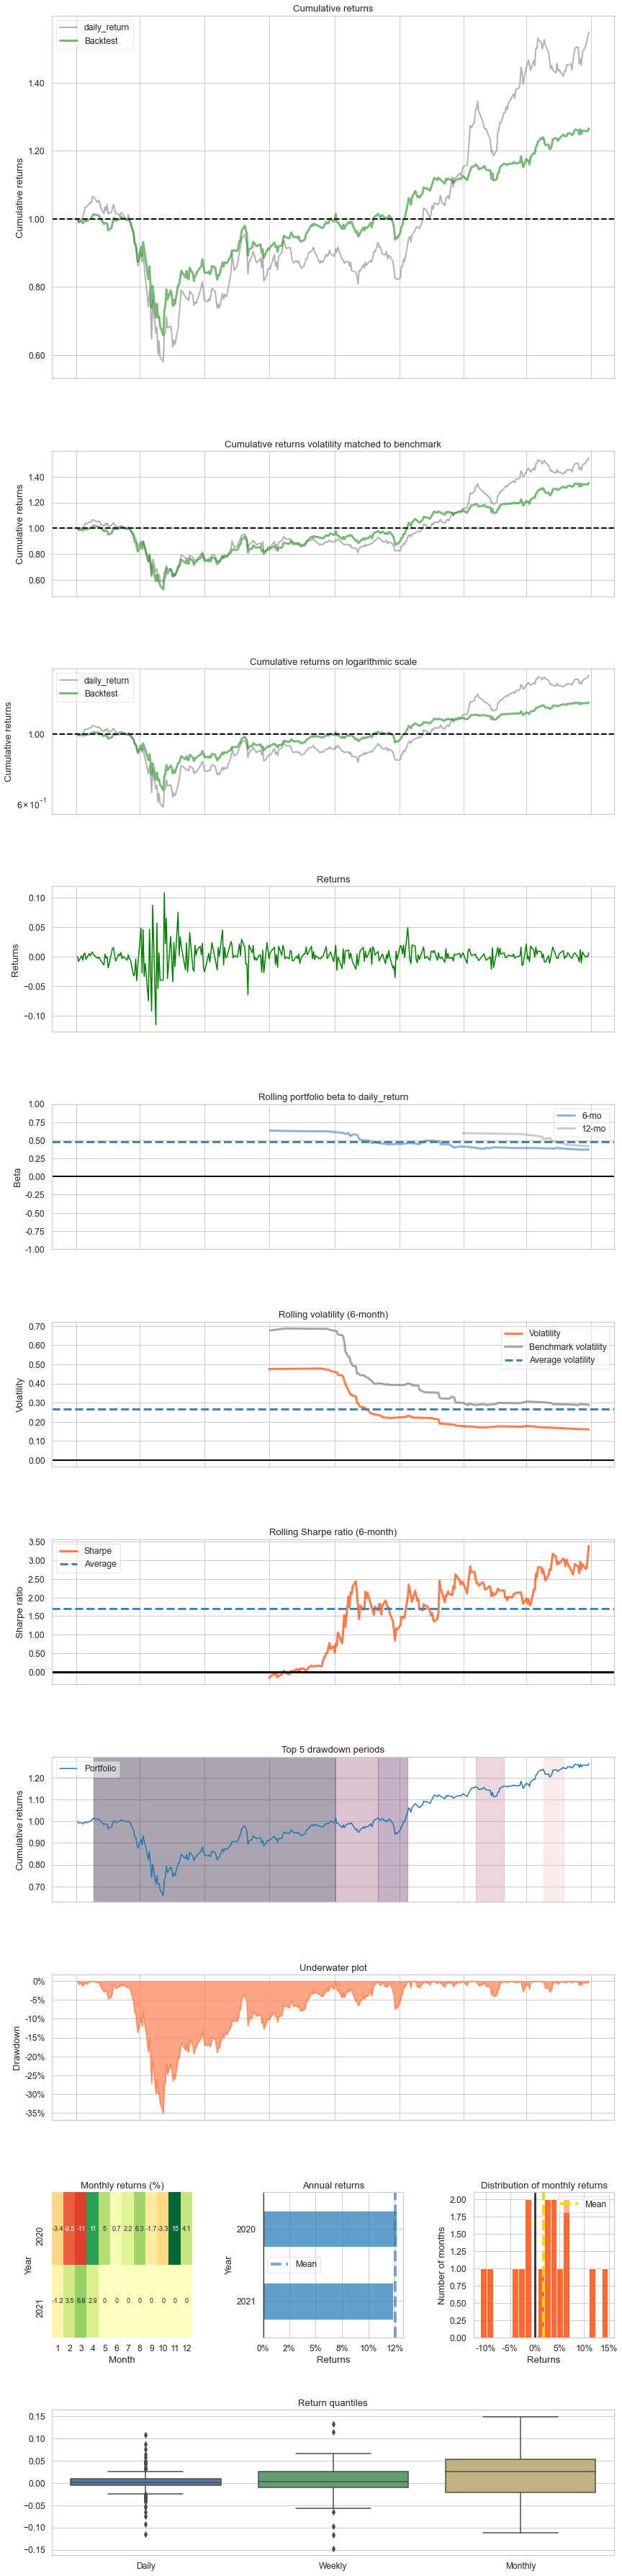

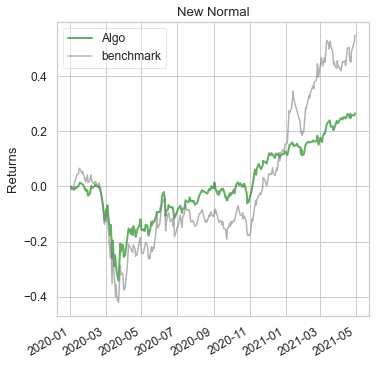

In [220]:
import pyfolio

ticker = ''
print(f"Current Index:{stock_index}")
while ticker not in stock_index:
    ticker = input("Enter a stock ticker:") 

baseline_df = get_baseline(ticker=ticker, start=trade_start, end=trade_end)

baseline_returns = get_daily_return(baseline_df, value_col_name="close")

with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = DRL_strat,
                                       benchmark_rets=baseline_returns, set_context=False)